# we are working on the soyabeen data according to the date price relationship


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply


In [84]:
cols = ['MarketName','commodity','variety','Modal price','Date']
drop_col = ['Sl no.','District Name','Grade','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)']

In [85]:
data = pd.read_csv('soya1.csv')
data = data.drop(drop_col,axis=1)
data.columns = cols

data

,MarketName,commodity,variety,Modal price,Date
0,A lot,Soyabean,Yellow,5530.0,31-Dec-22
1,A lot,Soyabean,Yellow,5540.0,30-Dec-22
2,A lot,Soyabean,Yellow,5480.0,29-Dec-22
3,A lot,Soyabean,Yellow,5451.0,27-Dec-22
4,A lot,Soyabean,Yellow,5400.0,26-Dec-22
...,...,...,...,...,...
26910,Vidisha,Soyabean,Yellow,5500.0,10-Jan-22
26911,Vidisha,Soyabean,Yellow,5200.0,07-Jan-22
26912,Vidisha,Soyabean,Yellow,5355.0,05-Jan-22
26913,Vidisha,Soyabean,Yellow,5465.0,03-Jan-22


In [86]:
data[data['MarketName']== 'A lot']

,MarketName,commodity,variety,Modal price,Date
0,A lot,Soyabean,Yellow,5530.0,31-Dec-22
1,A lot,Soyabean,Yellow,5540.0,30-Dec-22
2,A lot,Soyabean,Yellow,5480.0,29-Dec-22
3,A lot,Soyabean,Yellow,5451.0,27-Dec-22
4,A lot,Soyabean,Yellow,5400.0,26-Dec-22
...,...,...,...,...,...
244,A lot,Soyabean,Yellow,6380.0,11-Jan-22
245,A lot,Soyabean,Yellow,6300.0,10-Jan-22
246,A lot,Soyabean,Yellow,6000.0,06-Jan-22
247,A lot,Soyabean,Yellow,6270.0,05-Jan-22


In [127]:
x1 = data[data['MarketName'] == 'Vidisha']

x1['Date'] = pd.to_datetime(x1['Date'])


C:\Users\yuvra\AppData\Local\Temp\ipykernel_2204\544779053.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x1['Date'] = pd.to_datetime(x1['Date'])
C:\Users\yuvra\AppData\Local\Temp\ipykernel_2204\544779053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['Date'] = pd.to_datetime(x1['Date'])


In [129]:
x1 = x1.sort_values(by="Date")


In [130]:
x1

,MarketName,commodity,variety,Modal price,Date
26914,Vidisha,Soyabean,Yellow,5200.0,2022-01-01
26913,Vidisha,Soyabean,Yellow,5465.0,2022-01-03
26912,Vidisha,Soyabean,Yellow,5355.0,2022-01-05
26911,Vidisha,Soyabean,Yellow,5200.0,2022-01-07
26910,Vidisha,Soyabean,Yellow,5500.0,2022-01-10
...,...,...,...,...,...
26700,Vidisha,Soyabean,Yellow,5400.0,2022-12-27
26699,Vidisha,Soyabean,Yellow,5460.0,2022-12-28
26698,Vidisha,Soyabean,Yellow,5330.0,2022-12-29
26697,Vidisha,Soyabean,Yellow,5430.0,2022-12-30


In [131]:
x1['Datereal'] = x1['Date'].apply(lambda x : x.strftime('%d%m%Y'))


In [161]:
x1.shape

(219, 8)

In [162]:
x1.index = np.arange(len(x1.index))

In [169]:
x1[x1.index == 60]

,MarketName,commodity,variety,Modal price,Date,Datereal,Ma12,Ma30
60,Vidisha,Soyabean,Yellow,7400.0,2022-04-16,16042022,NaN,7360.566667


# from here we are going to use pycaret

In [170]:
x1['Ma30'] = x1['Modal price'].rolling(window=30).mean()
x1['Ma12'] = x1['Modal price'].rolling(window=12).mean()

In [172]:
x1[x1.index==12]

,MarketName,commodity,variety,Modal price,Date,Datereal,Ma12,Ma30
12,Vidisha,Soyabean,Yellow,6325.0,2022-01-22,22012022,5552.083333,NaN


In [173]:

import plotly.express as px
fig = px.line(x1, x="Date", y=["Modal price","Ma12","Ma30"], template = 'plotly_dark')
fig.show()

In [176]:
x1['Month'] = [i.month for i in x1['Date']]
x1['Year'] = [i.year for i in x1['Date']]
xnew = x1.drop(['Date','Ma12','Ma30'],axis=1)
xnew


,MarketName,commodity,variety,Modal price,Datereal,Month,Year
0,Vidisha,Soyabean,Yellow,5200.0,01012022,1,2022
1,Vidisha,Soyabean,Yellow,5465.0,03012022,1,2022
2,Vidisha,Soyabean,Yellow,5355.0,05012022,1,2022
3,Vidisha,Soyabean,Yellow,5200.0,07012022,1,2022
4,Vidisha,Soyabean,Yellow,5500.0,10012022,1,2022
...,...,...,...,...,...,...,...
214,Vidisha,Soyabean,Yellow,5400.0,27122022,12,2022
215,Vidisha,Soyabean,Yellow,5460.0,28122022,12,2022
216,Vidisha,Soyabean,Yellow,5330.0,29122022,12,2022
217,Vidisha,Soyabean,Yellow,5430.0,30122022,12,2022


## new section start from here

In [88]:
y = data['Modal price']
y

0        5530.0
1        5540.0
2        5480.0
3        5451.0
4        5400.0
          ...  
26910    5500.0
26911    5200.0
26912    5355.0
26913    5465.0
26914    5200.0
Name: Modal price, Length: 26915, dtype: float64

In [89]:
x_col = ['MarketName','commodity','variety','Date']

In [90]:
x = data[x_col]

In [91]:
x

,MarketName,commodity,variety,Date
0,A lot,Soyabean,Yellow,31-Dec-22
1,A lot,Soyabean,Yellow,30-Dec-22
2,A lot,Soyabean,Yellow,29-Dec-22
3,A lot,Soyabean,Yellow,27-Dec-22
4,A lot,Soyabean,Yellow,26-Dec-22
...,...,...,...,...
26910,Vidisha,Soyabean,Yellow,10-Jan-22
26911,Vidisha,Soyabean,Yellow,07-Jan-22
26912,Vidisha,Soyabean,Yellow,05-Jan-22
26913,Vidisha,Soyabean,Yellow,03-Jan-22


In [92]:
x['Date'] = pd.to_datetime(x['Date'])

C:\Users\yuvra\AppData\Local\Temp\ipykernel_2204\4176814728.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x['Date'] = pd.to_datetime(x['Date'])
C:\Users\yuvra\AppData\Local\Temp\ipykernel_2204\4176814728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Date'] = pd.to_datetime(x['Date'])


In [93]:
x

,MarketName,commodity,variety,Date
0,A lot,Soyabean,Yellow,2022-12-31
1,A lot,Soyabean,Yellow,2022-12-30
2,A lot,Soyabean,Yellow,2022-12-29
3,A lot,Soyabean,Yellow,2022-12-27
4,A lot,Soyabean,Yellow,2022-12-26
...,...,...,...,...
26910,Vidisha,Soyabean,Yellow,2022-01-10
26911,Vidisha,Soyabean,Yellow,2022-01-07
26912,Vidisha,Soyabean,Yellow,2022-01-05
26913,Vidisha,Soyabean,Yellow,2022-01-03


In [125]:
x2 = x[x['MarketName'] == 'A lot'].sort_values(by='Date')
x2

,MarketName,commodity,variety,Date
248,A lot,Soyabean,Yellow,2022-01-04
247,A lot,Soyabean,Yellow,2022-01-05
246,A lot,Soyabean,Yellow,2022-01-06
245,A lot,Soyabean,Yellow,2022-01-10
244,A lot,Soyabean,Yellow,2022-01-11
...,...,...,...,...
4,A lot,Soyabean,Yellow,2022-12-26
3,A lot,Soyabean,Yellow,2022-12-27
2,A lot,Soyabean,Yellow,2022-12-29
1,A lot,Soyabean,Yellow,2022-12-30


In [95]:
x.

,MarketName,commodity,variety,Date
0,A lot,Soyabean,Yellow,2022-12-31
1,A lot,Soyabean,Yellow,2022-12-30
2,A lot,Soyabean,Yellow,2022-12-29
3,A lot,Soyabean,Yellow,2022-12-27
4,A lot,Soyabean,Yellow,2022-12-26
...,...,...,...,...
26910,Vidisha,Soyabean,Yellow,2022-01-10
26911,Vidisha,Soyabean,Yellow,2022-01-07
26912,Vidisha,Soyabean,Yellow,2022-01-05
26913,Vidisha,Soyabean,Yellow,2022-01-03


In [133]:
from sklearn.linear_model import LinearRegression


In [134]:
model = LinearRegression()


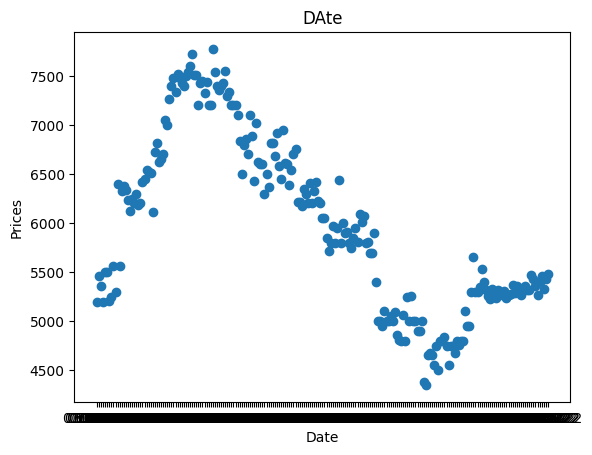

In [135]:

ply.scatter(x1['Datereal'],x1['Modal price'])
ply.title('DAte')
ply.ylabel("Prices")
ply.xlabel('Date')
ply.show()

In [99]:
x.

,MarketName,commodity,variety,Date
0,A lot,Soyabean,Yellow,2022-12-31
1,A lot,Soyabean,Yellow,2022-12-30
2,A lot,Soyabean,Yellow,2022-12-29
3,A lot,Soyabean,Yellow,2022-12-27
4,A lot,Soyabean,Yellow,2022-12-26
...,...,...,...,...
26910,Vidisha,Soyabean,Yellow,2022-01-10
26911,Vidisha,Soyabean,Yellow,2022-01-07
26912,Vidisha,Soyabean,Yellow,2022-01-05
26913,Vidisha,Soyabean,Yellow,2022-01-03


In [100]:
y.shape

(26915,)

In [101]:
x.shape

(26915, 4)

In [136]:
train,val,test = np.split(x1.sample(frac=1),[int(0.6 * len(x1)),int(0.8 * len(x1))])

c:\Users\yuvra\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [137]:
train

,MarketName,commodity,variety,Modal price,Date,Datereal
26786,Vidisha,Soyabean,Yellow,6010.0,2022-08-16,16082022
26771,Vidisha,Soyabean,Yellow,5000.0,2022-09-06,06092022
26858,Vidisha,Soyabean,Yellow,7775.0,2022-04-06,06042022
26794,Vidisha,Soyabean,Yellow,5900.0,2022-08-01,01082022
26905,Vidisha,Soyabean,Yellow,5300.0,2022-01-18,18012022
...,...,...,...,...,...,...
26742,Vidisha,Soyabean,Yellow,4750.0,2022-10-20,20102022
26857,Vidisha,Soyabean,Yellow,7540.0,2022-04-07,07042022
26773,Vidisha,Soyabean,Yellow,5000.0,2022-09-03,03092022
26820,Vidisha,Soyabean,Yellow,6545.0,2022-06-16,16062022


In [138]:
a = train['Datereal'].values.reshape(-1,1)
b = train['Modal price'].values.reshape(-1,1)
a


array([['16082022'],
       ['06092022'],
       ['06042022'],
       ['01082022'],
       ['18012022'],
       ['05012022'],
       ['13122022'],
       ['05072022'],
       ['14102022'],
       ['15022022'],
       ['04112022'],
       ['15102022'],
       ['08092022'],
       ['09122022'],
       ['15072022'],
       ['24042022'],
       ['01092022'],
       ['23052022'],
       ['21092022'],
       ['12102022'],
       ['21052022'],
       ['31012022'],
       ['09032022'],
       ['07062022'],
       ['31102022'],
       ['07012022'],
       ['14122022'],
       ['27122022'],
       ['09052022'],
       ['17102022'],
       ['10062022'],
       ['20062022'],
       ['19122022'],
       ['11012022'],
       ['29112022'],
       ['20012022'],
       ['19112022'],
       ['18022022'],
       ['09022022'],
       ['02092022'],
       ['30062022'],
       ['06122022'],
       ['28122022'],
       ['23122022'],
       ['30122022'],
       ['13072022'],
       ['09062022'],
       ['1804

In [139]:
c = test['Datereal'].values.reshape(-1,1)
d = test['Modal price'].values.reshape(-1,1)


In [140]:
import copy
def get_xy(dataframe,ylabel,xlabel=None):
    dataframe = copy.deepcopy(dataframe)
    if xlabel is None:
        x = dataframe[[c for c in dataframe.columns if c!=ylabel ]].values
    else:
        if len(xlabel) == 1:
            x = dataframe[xlabel[0]].values.reshape(-1,1)
        else:
            x = dataframe[xlabel].values
    
    y = dataframe[ylabel].values.reshape(-1,1)
    data = np.hstack((x,y))
    return data,x,y

In [141]:
c

array([['05092022'],
       ['19032022'],
       ['14072022'],
       ['29082022'],
       ['24012022'],
       ['07122022'],
       ['15012022'],
       ['11102022'],
       ['30112022'],
       ['21082022'],
       ['10022022'],
       ['15122022'],
       ['17112022'],
       ['28012022'],
       ['02072022'],
       ['28092022'],
       ['27042022'],
       ['02022022'],
       ['25052022'],
       ['17092022'],
       ['21032022'],
       ['17062022'],
       ['05032022'],
       ['07092022'],
       ['11032022'],
       ['31122022'],
       ['24122022'],
       ['02112022'],
       ['24062022'],
       ['06062022'],
       ['11112022'],
       ['05022022'],
       ['11072022'],
       ['18102022'],
       ['10112022'],
       ['04072022'],
       ['10012022'],
       ['01112022'],
       ['22092022'],
       ['26082022'],
       ['02052022'],
       ['27062022'],
       ['04022022'],
       ['03032022']], dtype=object)

In [142]:
modaltrain,xtrain,ytrain = get_xy(train,"Modal price",xlabel=["Datereal"])
modalval,xval,yval = get_xy(train,"Modal price",xlabel=["Datereal"])
modaltest,xtest,ytest = get_xy(train,"Modal price",xlabel=["Datereal"])


In [143]:
model.fit(a,b)

LinearRegression()

In [ ]:
model

LinearRegression()

In [144]:
print(model.coef_,model.intercept_)

[[-3.38178707e-06]] [5983.97696674]


In [145]:
model.score(c,d)

0.0061209831352267985

In [179]:
from sklearn.metrics import classification_report

In [180]:
ypredict = model.predict(xtest)
print(classification_report(ytest,ypredict))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [146]:
import tensorflow as tf

TypeError: unhashable type: 'numpy.ndarray'

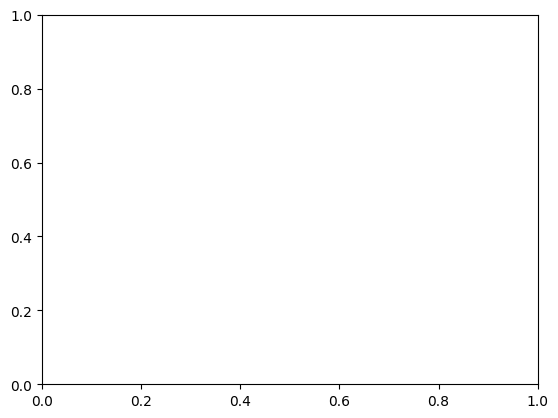

In [147]:
ply.scatter(a,b,label="data",color="blue")
x = tf.linspace(-20,40,100)
ply.plot(x,model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
ply.legend()
ply.title("Bike vs temp") 
ply.xlabel("temp")
ply.ylabel("number of bikes")
ply.show()